<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones básicas en pandas
* Preprocesamiento y exploración inicial de datos
* Regresión Lineal Multivariada
* PCA, LDA
* Selección de atributos _from scratch_, Métodos Wrapper e Información Mutual
* Selección de modelos por _Cross Validation_


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o un por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "avalderr") al correo electrónico del ayudante (*<alvaro.valderrama.13@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF393/578-2019 Tarea1]
* Fecha de entrega y presentaciones: 26 de Abril. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Aprendizaje con regresión lineal  
[2.](#segundo) Análisis de audios como datos brutos  
[3.](#tercero) Análisis de emociones en tweets

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes seran valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_.

<a id="primero"></a>
## 1. Aprendizaje con regresión lineal.

La regresión lineal, modelo que busca la mejor forma de combinar linealmente variables para predecir otra variable numérica es una de las herramientas más básicas a nuestra disposición. Sin embargo se puede encontrar muchas aplicaciones a esta aproximación con buenos resultados, y suele ser un buen punto de partida para problemas totalmente desconocidos por su velocidad de implementar y simpleza de interpretar. Además, al igual que muchas de las técnicas de _Machine Learning_, no tiene un ambito de uso definido, es decir podemos aplicar un metodo similar para problemas radicalmente distintos. 

<img src="https://i.stack.imgur.com/cNJQs.png" style="height:50%;" />

En esta primera parte de la tarea, trabajaremos con un _dataset_ de _Kaggle_ llamado "_Black Friday_", el cual contiene alrededor de medio millón de registros. Este _dataset_ contiene diversas informaciones sobres los consumidores (edad, ocupación, género, entre otros) y el valor de la compra que realizaron al momento de la medición. Pueden descargar el _dataset_ desde https://www.kaggle.com/mehdidag/black-friday. Este _dataset_ fue pensado para intentar de predecir el valor de compra de un cliente en funcion de sus caracteristicas, sin embargo uno puede realizar distintas regresiones y tratar, por ejemplo, de predecir el rango de edad de un cliente basado en sus otras caracteristicas incluyendo el valor de su compra. En esta primera parte utilizaremos el set de datos para hacer regresión lineal sobre el valor de compra, es decir la variable a predecir es el valor de compra. 


 #### 1.a Modulos y carga de datos
 Comenzaremos cargando las librerias relevantes para el resto de la tarea y cargando los datos a un _DataFrame_ para facilitar su manipulación. Explore los tipos de datos que hemos cargado, los valores que tienen estos datos y como se distribuyen. 


In [1]:
!unzip black-friday.zip

Archive:  black-friday.zip
  inflating: BlackFriday.csv         


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style()
%matplotlib inline

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv("BlackFriday.csv")
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

Cuente los valores N/A de cada columna con el siguiente código y explique brevemente porque en un primer momento preferiremos eliminar la segunda y tercera categoría del producto.

 Cuantos registros hay de mujeres y de hombres? Cuanto gastan en promedio los distintos rangos de edad? Entregue alguna otra medicion que le parezca interesante y permita familiarizarse con los datos.

In [41]:
print(data.isna().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64


In [42]:
print(data.groupby("Gender").User_ID.nunique())

Gender
F    1666
M    4225
Name: User_ID, dtype: int64


In [43]:
print(np.sort(data['Product_Category_1'].unique()))
print(np.sort(data['Product_Category_2'].unique()))
print(np.sort(data['Product_Category_3'].unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]
[ 3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. nan]


In [44]:
print(data['Gender'].value_counts())

M    405380
F    132197
Name: Gender, dtype: int64


In [58]:
data.groupby('Age').mean()['Purchase']

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

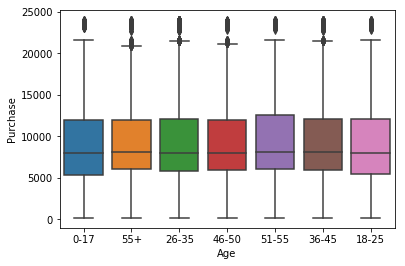

In [60]:
sns.boxplot(x='Age',y='Purchase',data=data)
plt.show()

In [46]:
data.describe()

User_ID    Occupation  Marital_Status  Product_Category_1  \
count  5.375770e+05  537577.00000   537577.000000       537577.000000   
mean   1.002992e+06       8.08271        0.408797            5.295546   
std    1.714393e+03       6.52412        0.491612            3.750701   
min    1.000001e+06       0.00000        0.000000            1.000000   
25%    1.001495e+06       2.00000        0.000000            1.000000   
50%    1.003031e+06       7.00000        0.000000            5.000000   
75%    1.004417e+06      14.00000        1.000000            8.000000   
max    1.006040e+06      20.00000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       370591.000000       164278.000000  537577.000000  
mean             9.842144           12.669840    9333.859853  
std              5.087259            4.124341    4981.022133  
min              2.000000            3.000000     185.000000  
25%              5.000000            9.000000    5866.000000  
50%              9.000000           14.000000    8062.000000  
75%             15.000000           16.000000   12073.000000  
max             18.000000           18.000000   23961.000000

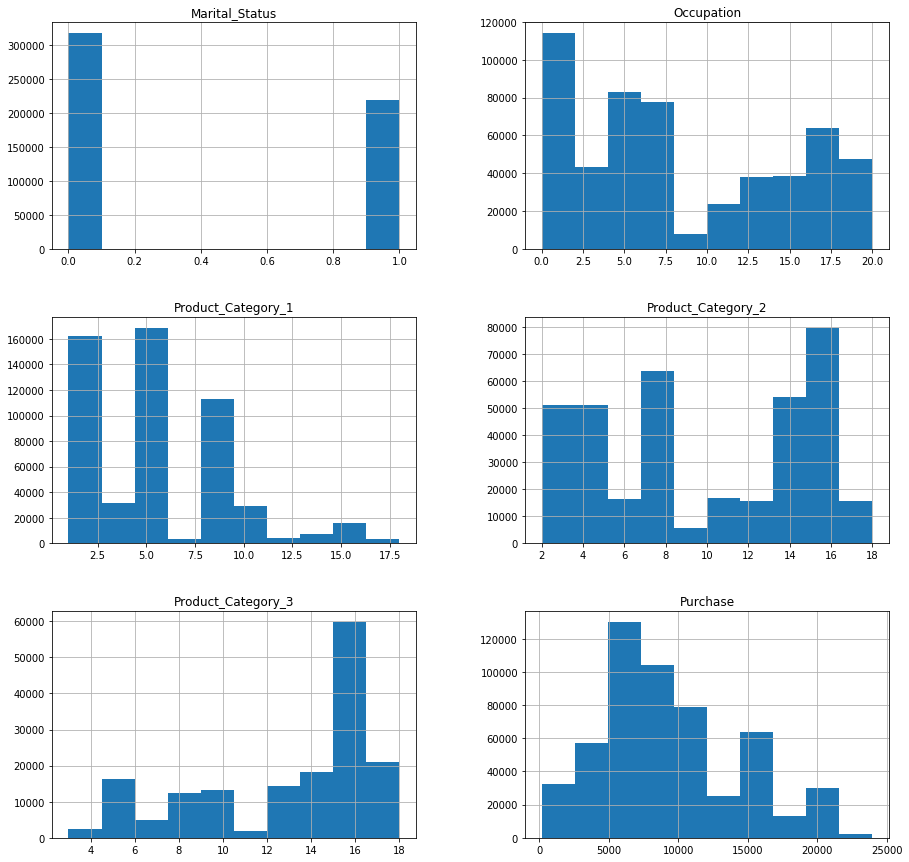

In [48]:
data.drop(columns=['User_ID']).hist(figsize=(15,15))
plt.show()

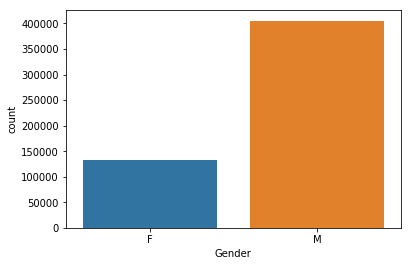

In [49]:
sns.countplot(x="Gender",data=data)
plt.show()

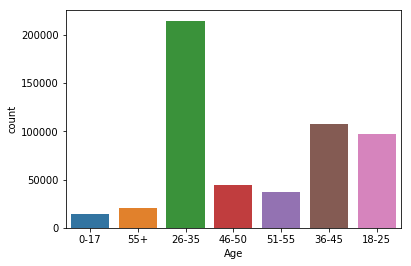

In [50]:
sns.countplot(x="Age",data=data)
plt.show()

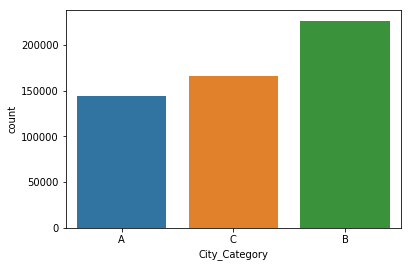

In [51]:
sns.countplot(x="City_Category",data=data)
plt.show()

 #### 1.b Columnas descartadas
De los tipos de datos que tenemos cuales resultarán problematicos para realizar regresión lineal? Del dato "City_Category", cuantos valores distintos existen? (puede usar el metodo .unique por ejemplo)
Porqué a pesar de ser dato numerico las columnas "Product_Category" podrían comportarse mal con la regresión lineal?

In [8]:
print(data.dtypes)
data = data.drop(columns=['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']) 

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


 #### 1.c  Datos Categoricos
 Transformaremos ahora los datos no numericos a datos numéricos. Para esto transformaremos el género a una variable binaria como muestra el código siguiente. Transforme todos los datos problematicos de manera similar. Discuta la eleccion realizada para "City_Category", más adelante haremos otra propuesta. Para los rangos de edad puede utilizar el promedio de ambos valores. Discuta si tiene alguna relevancia la elección del valor numerigo (_e.g._ 1 ó 0 para mujer) para el modelo de regresión lineal. Es así en todos los casos o solo para variables binarias?
 Por qué el dato "Occupation" no podemos utilizarlo directamente a pesar de ser numérico? Que solucion nos da el metodo `get_dummies` de pandas?

In [9]:
print(data['Gender'].unique())
print(data['Age'].unique())
print(data['City_Category'].unique())
print(data['Stay_In_Current_City_Years'].unique())

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['A' 'C' 'B']
['2' '4+' '3' '1' '0']


In [10]:
gender_dict = {'F':1,'M':0}
age_dict = {'0-17':0,'18-25':1, '26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}
siccy_dict = {'0':0,'1':1,'2':2,'3':3,'4+':0}
city_cat_dic = {'A':-1, 'C':0, 'B':1}

data['Gender'] = data.Gender.apply(lambda x: gender_dict[x])
data['Age'] = data.Age.apply(lambda x: age_dict[x])
data['Stay_In_Current_City_Years'] = data.Stay_In_Current_City_Years.apply(lambda x: siccy_dict[x])
data['City_Category'] = data.City_Category.apply(lambda x: city_cat_dic[x])

#city_dummies = pd.get_dummies(data.City_Category,prefix="city")
occupation_dummies = pd.get_dummies(data.Occupation,prefix="occupation")
col = list(data.columns)
#col.remove('City_Category')
col.remove('Occupation')
data_pre = data[col]
#data_pre = data_pre.join(city_dummies)
data_pre = data_pre.join(occupation_dummies)

In [11]:
data_pre.head()

Gender  Age  City_Category  Stay_In_Current_City_Years  Marital_Status  \
0       1    0             -1                           2               0   
1       1    0             -1                           2               0   
2       1    0             -1                           2               0   
3       1    0             -1                           2               0   
4       0    6              0                           0               0   

   Purchase  occupation_0  occupation_1  occupation_2  occupation_3  \
0      8370             0             0             0             0   
1     15200             0             0             0             0   
2      1422             0             0             0             0   
3      1057             0             0             0             0   
4      7969             0             0             0             0   

       ...        occupation_11  occupation_12  occupation_13  occupation_14  \
0      ...                    0              0              0              0   
1      ...                    0              0              0              0   
2      ...                    0              0              0              0   
3      ...                    0              0              0              0   
4      ...                    0              0              0              0   

   occupation_15  occupation_16  occupation_17  occupation_18  occupation_19  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              1              0              0              0   

   occupation_20  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 27 columns]

 #### 1.d  Separación de datos
 Separaremos los datos en _train_, _validation_ y _test_ con 75%, 15% y 10% de los datos respectivamente. Verifique que se cumplen aproximadamente las proporciones. Luego separe el _target_ del resto de las variables que consideraremos. 

In [12]:
data_pre_train, data_pre_temp = train_test_split(data_pre, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)
print("train:{:.2f}%, validation:{:.2f}%, test:{:.2f}%".format(len(data_pre_train)/len(data)*100,len(data_pre_val)/len(data)*100,len(data_pre_test)/len(data)*100))
data_x_train = data_pre_train.drop(columns='Purchase')
data_y_train = data_pre_train['Purchase']

data_x_val = data_pre_val.drop(columns='Purchase')
data_y_val = data_pre_val['Purchase']

data_x_test = data_pre_test.drop(columns='Purchase')
data_y_test = data_pre_test['Purchase']


train:75.00%, validation:15.00%, test:10.00%


 #### 1.e  Estandarización
 Utilizaremos `Standar_Scaler` para estandarizar los datos antes de entrenar. Que ventaja tiene en su opinion el tener un objeto que permite estandarizar (y hacer la transformación inversa) frente a hacer la opreación aritmetica "manualmente"? Note el cambio de tipo entre `data_x_train` y `x_train`. Tiene utilidad estandarizar el _target_ para este modelo? Guarde el _target_ estandarizado de todas formas para comparar más adelante.

In [13]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaler_x.fit(data_x_train)
x_tr = scaler_x.transform(data_x_train)
x_val = scaler_x.transform(data_x_val)
x_test = scaler_x.transform(data_x_test)

scaler_y.fit(data_y_train.values.reshape(-1,1))
y_tr = scaler_y.transform(data_y_train.values.reshape(-1,1))
y_val = scaler_y.transform(data_y_val.values.reshape(-1,1))
y_test = scaler_y.transform(data_y_test.values.reshape(-1,1))

/opt/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/miniconda/envs/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
/opt/miniconda/envs/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
/opt/miniconda/envs/jupyterhub/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  import sys
/opt/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by S

 #### 1.f Primera Regresión
 Realice una regresión lineal con los datos escalados y no escalados. Compare sus _scores_. Cual es la formula del _score_ que utiliza el regresor (puede buscar en la documentación)? Qué interpretación se le puede dar al _score_? Puede concluir que los datos escalados o no escalados entregan un mejor modelo? Sobre que conjunto de datos (_train_, _test_ o _valitdation_) deberíamos comparar el _score_?

In [14]:
reg_scaled = LinearRegression()
reg_scaled.fit(x_tr,y_tr)
train_score = reg_scaled.score(x_tr,y_tr)
val_score = reg_scaled.score(x_val,y_val)
test_score = reg_scaled.score(x_test,y_test)
print("train score:{:.6f}, validation score:{:.6f}, test score:{:.6f}".format(train_score,val_score,test_score))

train score:0.006922, validation score:0.006343, test score:0.006115


In [15]:
reg_unscaled = LinearRegression()
reg_unscaled.fit(x_tr,data_y_train.values.reshape(-1,1))
train_score = reg_unscaled.score(x_tr,data_y_train.values.reshape(-1,1))
val_score = reg_unscaled.score(x_val,data_y_val.values.reshape(-1,1))
test_score = reg_unscaled.score(x_test,data_y_test.values.reshape(-1,1))
print("train score:{:.6f}, validation score:{:.6f}, test score:{:.6f}".format(train_score,val_score,test_score))

train score:0.006922, validation score:0.006342, test score:0.006116


In [16]:
reg_unscaled2 = LinearRegression()
reg_unscaled2.fit(data_x_train,data_y_train.values.reshape(-1,1))
train_score = reg_unscaled2.score(data_x_train,data_y_train.values.reshape(-1,1))
val_score = reg_unscaled2.score(data_x_val,data_y_val.values.reshape(-1,1))
test_score = reg_unscaled2.score(data_x_test,data_y_test.values.reshape(-1,1))
print("train score:{:.6f}, validation score:{:.6f}, test score:{:.6f}".format(train_score,val_score,test_score))

train score:0.006925, validation score:0.006339, test score:0.006100


 #### 1.g  Tranformaciones simples
 Grafique como se distribuyen los precios, apoyese en el siguiente código. Recuerde que los gráficos deben ir acompañados de título, nombre de ejes entre otros.
 Viendo el gráfico, pareciera que una representación lineal funcionará bien para modelar este tipo de datos?
 
Prueba algunas transformaciones simples, como logaritmo o raiz cuadrada y comente los gráficos. 

Estos gráficos permiten concluir algo sobre el comportamiento de un modelo lineal o solo sirven de caracter exploratorio?

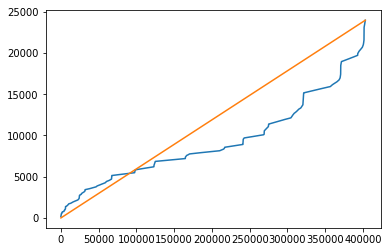

In [17]:
plt.plot(
    np.arange(0,data_y_train.shape[0],1),
    data_y_train.sort_values(),
    np.arange(0,data_y_train.shape[0],1),
    np.linspace(0,((data_y_train.sort_values())).max(),
                num=data_y_train.shape[0])
)
plt.show()

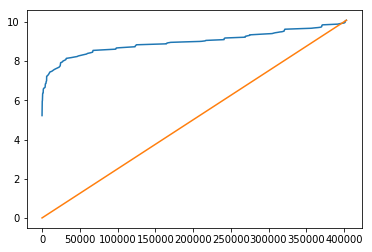

In [18]:
transformed_log = np.log(data_y_train.sort_values())

plt.plot(
    np.arange(0,data_y_train.shape[0],1),
    transformed_log,
    np.arange(0,data_y_train.shape[0],1),
    np.linspace(0,transformed_log.max(),
                num=data_y_train.shape[0])
)
plt.show()

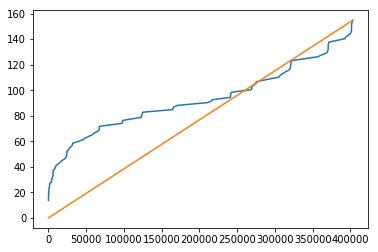

In [19]:
transformed_sqrt = np.sqrt(data_y_train.sort_values())

plt.plot(
    np.arange(0,data_y_train.shape[0],1),
    transformed_sqrt,
    np.arange(0,data_y_train.shape[0],1),
    np.linspace(0,transformed_sqrt.max(),
                num=data_y_train.shape[0])
)
plt.show()

#### 1.h 10-_fold_ sobre la potencia
Probaremos la utilidad real de realizar una transformación del target del tipo $P \gets P^{i}$ con $i \in [0,2]$ haciendo 10-_fold_ variando el valor de $i$ en a lo menos 10 incrementos. Puede basarse en la estrucuta siguiente. Debe elegir un estimador del error de validación de cada modelo (_e.g._ mediana, promedio...) y comentar brevemente por qué eligio tal estimador. 
Luego grafique como varia el error de validación en función de _i_. 
Finalmente, con el mejor valor de $i$ encontrado, entrene un regresor lineal con todos los datos de entrenamiento y compare su densempeño con los modelos anteriores.
Puede afirmar que alguna de las transformaciones mejore el desempeño del modelo? 

In [30]:
%%time

folds = KFold(10)
results = []
for i in range(1,21):
    folds_results = []
    for train_index, val_index in folds.split(x_tr):
        y_i = data_y_train.values**(i/10)
        y_tr_i = y_i[train_index]
        y_val_i = y_i[val_index]
        
        x_tr_i = x_tr[train_index]
        x_val_i = x_tr[val_index]
        reg_i = LinearRegression()
        reg_i.fit(x_tr_i,y_tr_i)
        
        train_score = reg_i.score(x_tr_i,y_tr_i)
        val_score = reg_i.score(x_val_i,y_val_i)
        
        folds_results.append(val_score)
    results.append({'i':i,'mean':np.mean(folds_results),'std':np.std(folds_results),'folds':folds_results})
results = pd.DataFrame(results)

CPU times: user 5min 3s, sys: 6.26 s, total: 5min 9s
Wall time: 51.8 s


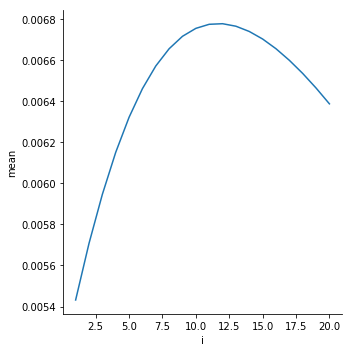

In [29]:
sns.lineplot(x='i',y='mean',ci='std',data=results)
plt.show()

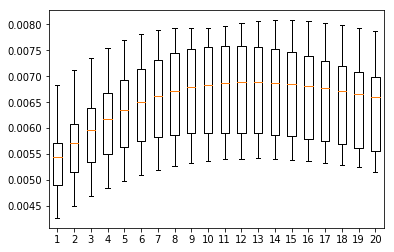

In [34]:
aux = []
for i in range(0,20):
    aux.append(results.iloc[i,:]['folds'])
plt.boxplot(aux)
plt.show()

In [21]:
best_model = results.sort_values('mean',ascending=False).iloc[0]
best_model

i       12.000000
mean     0.006777
std      0.000894
Name: 11, dtype: float64

In [25]:
best_i = best_model['i']

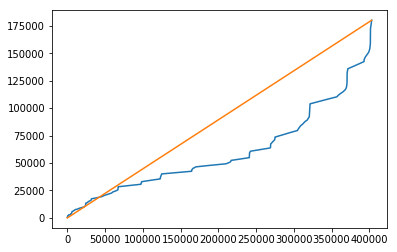

In [26]:
transformed_recip = data_y_train.sort_values()**(best_i/10)

plt.plot(
    np.arange(0,data_y_train.shape[0],1),
    transformed_recip,
    np.arange(0,data_y_train.shape[0],1),
    np.linspace(0,transformed_recip.max(),
                num=data_y_train.shape[0])
)
plt.show()

In [25]:
best_i_reg = LinearRegression()
best_i_reg.fit(data_x_train,data_y_train.values**(best_i/10))
train_score = best_i_reg.score(data_x_train,data_y_train.values**(best_i/10))
val_score = best_i_reg.score(data_x_val,data_y_val.values**(best_i/10))
test_score = best_i_reg.score(data_x_test,data_y_test.values**(best_i/10))
print("train score:{:.6f}, validation score:{:.6f}, test score:{:.6f}".format(train_score,val_score,test_score))

train score:0.006809, validation score:0.007199, test score:0.005781


#### 1.i _Q-Q plot_
Gráfique el _Quantile-Quantile Plot_ del residuo (error) de validación del merjo modelo que haya encontrado. Qué puede decir respecto al supuesto de normalidad de los residuos en los datos? 

((array([-4.29855253, -4.09768627, -3.9883572 , ...,  3.9883572 ,
          4.09768627,  4.29855253]),
  array([ 8172.00306236,  8172.64199964,  8173.22672164, ...,
         10265.59392079, 10266.36658914, 10266.7541281 ])),
 (407.26992074951585, 9328.498644636153, 0.9917925568266769))

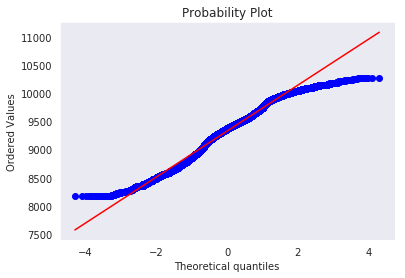

In [26]:
q_reg = LinearRegression()
q_reg.fit(data_x_train,data_y_train.values.reshape(-1,1))
train_score = q_reg.score(data_x_train,data_y_train.values.reshape(-1,1))
val_score = q_reg.score(data_x_val,data_y_val.values.reshape(-1,1))
val_predict = q_reg.predict(data_x_val)
err = val_predict - y_val
stats.probplot(err.T[0] ,dist='norm', plot=plt)

In [27]:
print(train_score,val_score)

0.006795621312505773 0.007163239632592688


#### 1.j Variables categoricas
Entrene ahora el modelo que mejor resultado obtuvo pero esta vez utilizando todos los atributos, transformando las variables categoricas no binarias. Como las variables categóricas no se relacionan linealmente al _target_ (pues no representan un valor numérico), debe transformarlas a variables binarias de igual manera que se realizó con la variable "Occupation" en la parte 1.c. 
Debe cargar de nuevo el DataFrame original pues borramos las columnas de categoría de producto.
Discuta por qué podría resultar útil agregar de esta misma manera el dato "City_Category" y no como se hizo inicialmente. 
Discuta los resultados obtenidos en comparación con la parte anterior.

In [28]:
data = pd.read_csv("BlackFriday.csv")

occupation_dummies = pd.get_dummies(data.Occupation,prefix="occupation")
col = list(data.columns)
#col.remove('City_Category')
col.remove('Occupation')
data_pre = data[col]
#data_pre = data_pre.join(city_dummies)
data_pre = data_pre.join(occupation_dummies)
data = data.drop(columns=['User_ID','Product_ID']) 
data = data.fillna(value=0) # para las categorias que estan en NAN

gender_dict = {'F':1,'M':0}
data['Gender'] = data.Gender.apply(lambda x: gender_dict[x])

siccy = pd.get_dummies(data.Stay_In_Current_City_Years,prefix="siccy")
age = pd.get_dummies(data.Age,prefix="age")
city_dummies = pd.get_dummies(data.City_Category,prefix="city")
occupation_dummies = pd.get_dummies(data.Occupation,prefix="occupation")

col = list(data.columns)
col.remove('Stay_In_Current_City_Years')
col.remove('City_Category')
col.remove('Occupation')
col.remove('Age')

data_pre = data[col]
data_pre = data_pre.join(siccy)
data_pre = data_pre.join(age)
data_pre = data_pre.join(city_dummies)
data_pre = data_pre.join(occupation_dummies)

data_pre_train, data_pre_temp = train_test_split(data_pre, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)
print("train:{:.2f}%, validation:{:.2f}%, test:{:.2f}%".format(len(data_pre_train)/len(data)*100,len(data_pre_val)/len(data)*100,len(data_pre_test)/len(data)*100))
data_x_train = data_pre_train.drop(columns='Purchase')
data_y_train = data_pre_train['Purchase']

data_x_val = data_pre_val.drop(columns='Purchase')
data_y_val = data_pre_val['Purchase']

data_x_test = data_pre_test.drop(columns='Purchase')
data_y_test = data_pre_test['Purchase']

regresion = LinearRegression()
regresion.fit(data_x_train,data_y_train.values.reshape(-1,1))
train_score = regresion.score(data_x_train,data_y_train.values.reshape(-1,1))
val_score = regresion.score(data_x_val,data_y_val.values.reshape(-1,1))
test_score = regresion.score(data_x_test,data_y_test.values.reshape(-1,1))
print("train score:{:.6f}, validation score:{:.6f}, test score:{:.6f}".format(train_score,val_score,test_score))


train:75.00%, validation:15.00%, test:10.00%
train score:0.136187, validation score:0.138588, test score:0.140812


<a id="segundo"></a>
## 2. Selección de Atributos. 

En esta segunda parte de la tarea estudiaremos un _dataset_ llamado "House Sales in King County", un conjunto de datos de ventas de casas, con diversa información sobre las casas vendidas y los precios de venta. Por la naturaleza variada de las casas y las percepciones de las personas que las compran el problema de predecir el valor de una casa a ser vendida resulta interesante pues si bien muchos supuestos razonables se cumplen la mayoría de las veces (una casa más grande suele costar más que una más chica), la percepción de los compradores puede cambiar mucho por caracteristicas dificiles de medir. 

<img src="https://pngimage.net/wp-content/uploads/2018/06/house-for-sale-sign-png-6.png"  style="height:14cm;"  />

Sin embargo, resulta facil imaginar que algunos de los datos resultan más relevantes que otros al momento de predecir, por esto haremos selección de atributos en esta parte de la pregunta. Este _dataset_ es mucho más limpio que lo usual, por lo cual la exploración inicial sera bastante corta. Luego de explorar los datos deberan realizar una exploración de los distintos atributos para evaluar que tan relevantes son en la predicción del resultado. Puede descargar el _dataset_ desde https://www.kaggle.com/harlfoxem/housesalesprediction donde también encontrará una descripción de las distintas columnas.

#### 2.a Carga de datos 

Cargue los datos a un DataFrame. Transformaremos la columna "date" como indica el siguiente código. Que transformación realiza este código? Elimine las columnas que le parezca pertinente. 

In [29]:
!unzip housesalesprediction.zip

Archive:  housesalesprediction.zip
  inflating: kc_house_data.csv       


In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [3]:
print(data.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))
    return res
data['date'] = data.date.apply(to_num).rank()

In [5]:
data.head()

id     date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  10544.0  221900.0         3       1.00         1180      5650   
1  6414100192  13682.5  538000.0         3       2.25         2570      7242   
2  5631500400  16699.0  180000.0         2       1.00          770     10000   
3  2487200875  13682.5  604000.0         4       3.00         1960      5000   
4  1954400510  16276.0  510000.0         3       2.00         1680      8080   

   floors  waterfront  view     ...      grade  sqft_above  sqft_basement  \
0     1.0           0     0     ...          7        1180              0   
1     2.0           0     0     ...          7        2170            400   
2     1.0           0     0     ...          6         770              0   
3     1.0           0     0     ...          7        1050            910   
4     1.0           0     0     ...          8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null float64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(15)
memory usage: 3.5 MB


In [7]:
data.describe()

id          date         price      bedrooms     bathrooms  \
count  2.161300e+04  21613.000000  2.161300e+04  21613.000000  21613.000000   
mean   4.580302e+09  10807.000000  5.400881e+05      3.370842      2.114757   
std    2.876566e+09   6239.228357  3.671272e+05      0.930062      0.770163   
min    1.000102e+06     34.000000  7.500000e+04      0.000000      0.000000   
25%    2.123049e+09   5431.000000  3.219500e+05      3.000000      1.750000   
50%    3.904930e+09  10795.500000  4.500000e+05      3.000000      2.250000   
75%    7.308900e+09  16198.000000  6.450000e+05      4.000000      2.500000   
max    9.900000e+09  21613.000000  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.086517      0.766318   
min      290.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1427.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.068800e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

           ...               grade    sqft_above  sqft_basement      yr_built  \
count      ...        21613.000000  21613.000000   21613.000000  21613.000000   
mean       ...            7.656873   1788.390691     291.509045   1971.005136   
std        ...            1.175459    828.090978     442.575043     29.373411   
min        ...            1.000000    290.000000       0.000000   1900.000000   
25%        ...            7.000000   1190.000000       0.000000   1951.000000   
50%        ...            7.000000   1560.000000       0.000000   1975.000000   
75%        ...            8.000000   2210.000000     560.000000   1997.000000   
max        ...           13.000000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean      84.402258  98077.939805     47.560053   -122.213896    1986.552492   
std      401.679240     53.505026      0.138564      0.140828     685.391304   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471000   -122.328000    1490.000000   
50%        0.000000  98065.000000     47.571800   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   21613.000000  
mean    12768.455652  
std     27304.179631  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000  

[8 rows x 21 columns]

In [8]:
data = data.drop(columns=['id']) #'sqft_living15','sqft_lot15','zipcode'

#### 2.b Preprocesamiento de los datos y visualización
Escale los datos de la misma forma que en la pregunta 1. Realice _Scatter plots_ de algunas pares (atributo, precio) que ustedes crean sean más significativos. Comente.

En este caso es recomendable estandarizar "a mano", pues mantener la estructura de DataFrame facilitará el ítem siguiente. En todo caso, puede elegir la opción que prefiera. 

Si la curiosidad, imaginación y tiempo le alcanza pruebe también realizando algunas transformaciones simples (logaritmica, cuadrática, _etc._)

[//]( https://vignette.wikia.nocookie.net/inciclopedia/images/6/6a/Bob_esponja_caja_de_imaginacion.JPG/revision/latest?cb=20081122000821 )

In [9]:
columns = data.columns
#columns = columns.drop('date')

data_pre = data.copy()

for col in columns:
    data_pre[col] = data_pre[col].apply(lambda x: (x - data_pre[col].mean())/data_pre[col].std())


In [10]:
data_pre

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     -0.042153 -0.866697 -0.398728  -1.447430    -0.979812 -0.228316   
1      0.460874 -0.005688 -0.398728   0.175603     0.533622 -0.189881   
2      0.944348 -0.980827 -1.473925  -1.447430    -1.426221 -0.123296   
3      0.460874  0.174086  0.676469   1.149422    -0.130547 -0.244009   
4      0.876551 -0.081956 -0.398728  -0.149004    -0.435412 -0.169649   
5     -1.644675  1.865598  0.676469   3.097062     3.636707  2.096136   
6     -1.122174 -0.769728 -0.398728   0.175603    -0.397303 -0.200093   
7      0.684540 -0.676164 -0.398728  -0.798217    -1.110469 -0.130273   
8      1.434152 -0.845996 -0.398728  -1.447430    -0.326531 -0.184376   
9      1.069844 -0.591316 -0.398728   0.500209    -0.206763 -0.206346   
10     1.307533  0.333432 -0.398728   0.500209     1.611536 -0.128221   
11    -1.498182 -0.196357 -1.473925  -1.447430    -1.001588 -0.219866   
12    -1.480952 -0.626726 -0.398728  -1.447430    -0.707612  0.115741   
13    -0.093762 -0.381579 -0.398728  -0.473610    -0.772940 -0.131021   
14     1.069844 -0.027479  1.751667  -0.149004    -0.293867 -0.247630   
15     0.730138  0.299384  0.676469   1.149422     0.947367 -0.244009   
16    -0.751535 -0.395199 -0.398728  -0.149004    -0.206763 -0.025759   
17    -1.466047 -0.150052  0.676469  -1.447430    -0.522516 -0.260909   
18     0.436673 -0.956312 -1.473925  -1.447430    -0.958036 -0.126917   
19     1.544422 -0.844634 -0.398728  -1.447430    -0.903596 -0.128752   
20    -1.617989 -0.422437  0.676469  -0.473610    -0.500740 -0.244492   
21    -0.481951  3.976583 -0.398728   0.824816     1.056247  0.718485   
22    -1.060468 -0.694822  1.751667   0.500209     0.206981 -0.212623   
23    -1.592505 -0.782803 -1.473925  -0.798217    -1.099581 -0.131915   
24     0.323197 -0.574973 -0.398728   0.175603     0.402966 -0.207795   
25     0.158193 -0.836463 -0.398728  -0.149004    -0.402747 -0.251324   
26    -1.140045  1.081129 -0.398728  -0.473610     0.402966 -0.299754   
27     0.385224  0.345689 -0.398728  -1.447430    -0.740276 -0.326552   
28    -1.181156 -0.278073 -0.398728  -0.473610    -0.609620 -0.210692   
29     0.974800  0.487329  0.676469   0.500209     0.533622 -0.191547   
...         ...       ...       ...        ...          ...       ...   
21583 -1.351369 -0.381716 -1.473925  -1.447430    -1.491549 -0.336789   
21584  0.400691 -0.436056 -0.398728   0.500209    -0.892708 -0.342994   
21585 -0.449976 -0.735680 -0.398728   0.500209    -0.228539 -0.244009   
21586 -0.015947 -0.095575 -1.473925   0.500209    -0.707612 -0.335727   
21587  1.010622 -0.422437 -0.398728   0.500209    -0.609620 -0.328798   
21588  0.255881 -0.342083 -1.473925  -0.798217    -0.947148 -0.333868   
21589 -0.345155 -0.524582 -0.398728   0.500209     0.500958 -0.249803   
21590 -1.617989  1.858789  0.676469   1.798635     3.081418 -0.136719   
21591 -0.129904  0.086923  0.676469   0.824816     0.751382 -0.271724   
21592  1.446493 -0.177290 -0.398728   0.175603    -0.968924 -0.335751   
21593  1.109592  1.492431  1.751667   2.123242     2.275705 -0.168153   
21594  0.011299 -0.517772  0.676469   0.824816     0.457406 -0.219987   
21595  0.148175 -0.054717 -1.473925   0.175603    -0.598732 -0.341038   
21596 -0.620910  0.380963  1.751667   0.824816     1.655088 -0.136888   
21597  1.489607  2.818946  0.676469   1.474029     1.448215 -0.120278   
21598 -0.042153  0.004663  0.676469   0.500209     1.130285 -0.174816   
21599 -0.306929  0.735200  0.676469   1.149422     2.079720 -0.175492   
21600 -0.015947  2.715440  1.751667   2.123242     2.602345 -0.169456   
21601  1.336784 -0.199081 -0.398728   0.500209    -0.713056 -0.336258   
21602 -1.140045 -0.860977 -0.398728  -0.473610    -0.631396 -0.075783   
21603 -0.500062 -0.089446 -0.398728   0.500209     0.206981 -0.231068   
21604  0.734786 -0.302588 -0.398728  -0.149004    -0.642284 -0.337537   
21605 -0.029972  0.192295  0.676469   0.500209     0.479182 -0.219311

In [11]:
print(data_pre.isna().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


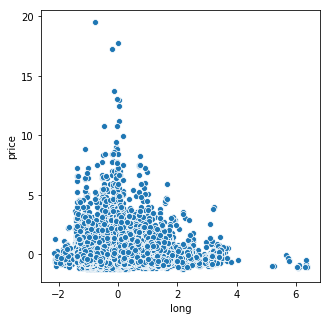

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='long',y='price',data=data_pre)
plt.show()

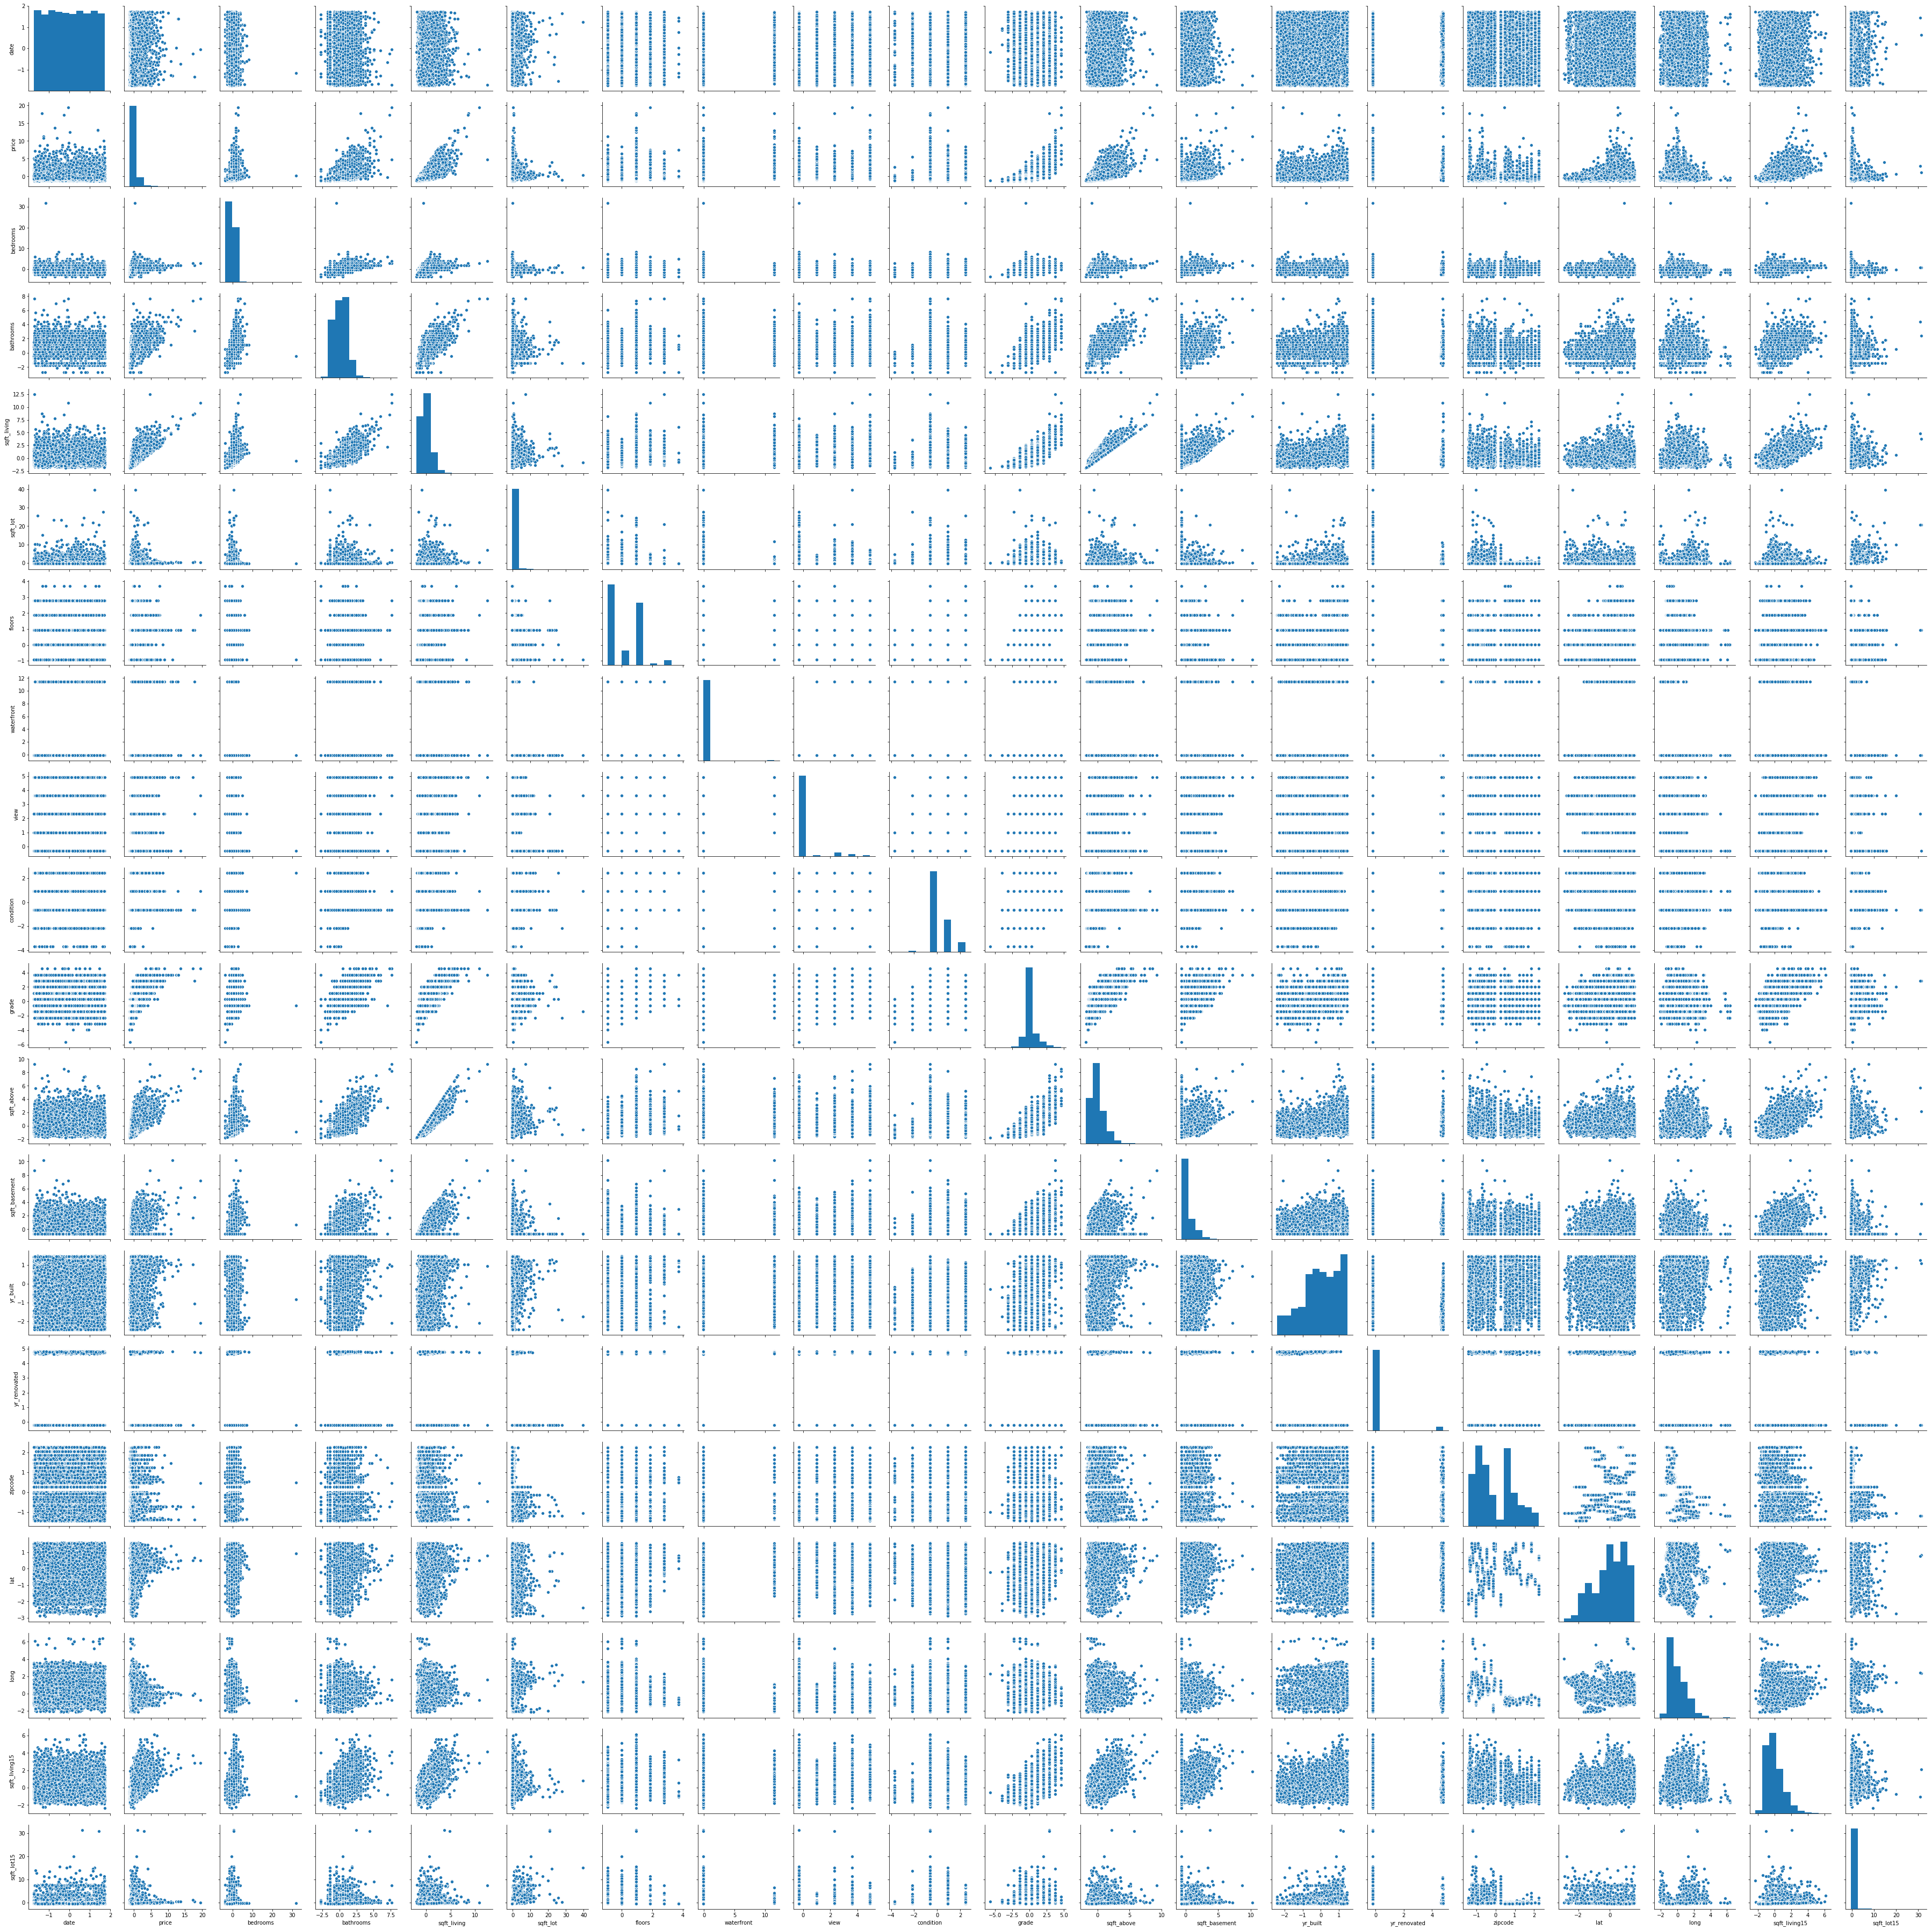

In [13]:
sns.pairplot(data=data_pre)

#### 2.c Selección de Atributos _by hand_
En esta parte comensaremos entrenando un modelo sin ningun atributo y luego iremos agregando 1 a 1 el atributo que más mejora los resultados de la predicción. En cada paso validaremos qué atributo es el mejor utilizando 5-_fold_ como aprendió en la pregunta anterior. 
Para el modelo sin ningun atributo utilizaremos una predicción constante igual al promedio de los datos de entrenamiento. Luego, en cada iteración, evaluaremos cada uno de los atributos restantes, viendo cual reduce más el error. El error que utilizaremos para esta pregunta sera el MSE o _Mean Square Error_. Luego de elegido un atributo, lo agregamos a la lista de atributos a utilizar y continuamos iterando hasta agotar los atributos restantes. 
Guarde los errores promedio a medida va agregando atributos al modelo y guarde la lista de los atributos que fue agregando, luego grafíque el error promedio en función del nuemero de atributos seleccionado.
Cual es el modelo que entrenga un menor error de validación (cual es su lista de atributos)?

In [33]:
tr_df, val_df = train_test_split(data, test_size=0.25,random_state=7)
columns = data.columns
columns = columns.drop('price')
for col in columns:
    mu = tr_df[col].mean()
    sigma = tr_df[col].std()
    tr_df.loc[:,col] = tr_df.loc[:,col].apply(lambda x: (x - mu)/sigma)
    val_df.loc[:,col] = val_df.loc[:,col].apply(lambda x: (x - mu)/sigma)
#val_df, test_df = train_test_split(temp_df, test_size= 0.4)

/opt/miniconda/envs/jupyterhub/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
tr_df

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
17178 -1.121351   399950.0 -0.396351   0.500014     0.526157 -0.114231   
10619  0.392084   799000.0  0.668357   1.795320     1.305482  0.132472   
11724 -0.302841   306000.0 -0.396351  -0.471465    -0.112456 -0.130320   
2366  -1.336338   665000.0  2.797774   1.147667     2.344582 -0.268000   
3512  -1.395154   749950.0  0.668357   0.823840     1.110651  0.518181   
5730  -0.563368   250000.0 -1.461059  -1.442945    -1.227324 -0.078434   
18709 -1.546819   430000.0 -0.396351   0.823840     0.504509 -0.095645   
2480   0.700483   432500.0 -0.396351  -0.147639    -0.393879 -0.172516   
16047 -0.010694   300000.0 -0.396351  -0.471465    -0.415527 -0.163949   
6207   0.569657   337500.0 -1.461059  -1.442945    -0.848486 -0.208568   
15214  1.019986   175000.0 -0.396351  -1.442945    -1.097437 -0.223025   
19725  0.129707  1375000.0  1.733066   2.119146     1.348778 -0.251632   
19375  0.617450   509000.0  0.668357  -0.147639    -0.491295 -0.336229   
15645 -1.139294   267000.0 -0.396351  -0.795292    -1.075789 -0.172134   
6895   0.743046   225000.0 -0.396351   0.500014    -1.151556 -0.328172   
3246   1.243582   299950.0 -0.396351  -0.795292    -0.155752 -0.151966   
8507  -0.563368   400000.0 -0.396351   0.176188    -0.372231 -0.098704   
14896  0.095672   667500.0 -0.396351  -0.147639    -0.047513 -0.256756   
8316  -1.395154   725000.0  0.668357   0.823840     0.363798 -0.100693   
11935  0.726472   260250.0 -0.396351  -0.471465    -0.642830 -0.167111   
7388  -0.220129   350000.0 -0.396351   1.471493    -0.523767 -0.347090   
13620 -1.498865   780000.0 -0.396351   1.147667     0.472037 -0.325316   
19940  1.134640   740000.0  1.733066   0.823840     1.045707 -0.188451   
7968   1.401926   432100.0 -0.396351   0.176188    -0.318112 -0.323072   
6095   1.030929   713900.0 -0.396351   0.500014     1.392074  3.895715   
14411 -0.289163   550000.0 -1.461059  -0.795292    -0.848486 -0.304460   
5836  -1.308258   440000.0  0.668357   0.176188    -0.079985 -0.187049   
12037  0.480347   257000.0  0.668357  -0.795292    -0.740246 -0.163465   
17305  1.520200  1070000.0  0.668357   0.500014     0.710164 -0.252702   
10395 -1.180569   518000.0  0.668357   0.823840     0.472037 -0.022699   
...         ...        ...       ...        ...          ...       ...   
16641  1.555924   339000.0 -0.396351   0.176188    -0.123280 -0.196355   
16215  0.407612   528000.0 -0.396351   0.823840     0.082375 -0.276006   
8964   1.243582   342000.0 -0.396351  -1.442945    -0.112456 -0.215733   
14537 -1.645945   156000.0 -0.396351  -1.442945    -1.205676 -0.161425   
8504   0.262223   549950.0 -0.396351   0.500014     0.320502 -0.316443   
12224  0.275820   265500.0 -0.396351  -1.442945    -0.242344 -0.144980   
15549  0.910240   565000.0  0.668357  -0.147639    -0.015041 -0.176723   
4859   1.189996  2048000.0  1.733066   2.442973     2.820836 -0.170910   
19381 -1.028099   950000.0 -0.396351   0.500014     1.511137 -0.181312   
12471 -1.579727   433500.0 -0.396351   0.500014     0.125671 -0.294516   
1176  -1.008146   565000.0 -0.396351   0.500014     0.450389 -0.191664   
3896  -0.088820   385000.0  1.733066  -0.795292    -0.361407 -0.130830   
11967  1.520200   325000.0 -1.461059  -1.442945    -1.162380 -0.222617   
3516  -0.749228   325000.0  0.668357  -0.471465    -0.144928 -0.061479   
7955   0.633059   299950.0  0.668357   0.176188    -0.296464 -0.186386   
13387  0.872827   260000.0 -0.396351  -1.442945    -0.188224 -0.158111   
17840 -0.244267   195000.0 -0.396351  -0.795292    -1.119085 -0.239317   
1092   1.707107   730000.0  1.733066  -0.471465     0.656045  0.164342   
6118   0.872827   325000.0  0.668357   0.823840    -0.134104 -0.152323   
19623 -1.593566   377500.0 -0.396351   0.176188    -0.729422 -0.345076   
13192 -0.478564   470000.0  0.668357   0.823840     0.071551 -0.129810   
20825 -0.263336   369946.0 -0.396351   0.500014     0.363798 -0.259714   
2583   0.798161

In [28]:
x_tr = tr_df.drop(columns=['price'])
y_tr = tr_df['price']

x_val = val_df.drop(columns=['price'])
y_val = val_df['price']

#x_test = val_df.drop(columns=['price'])
#y_test = val_df['price']

In [29]:
# esta estructura de código es solo una guía y presupone que x_tr es un DataFrame
restantes = list(x_tr.columns)
actuales = []
error_actual = ((y_tr-y_tr.mean())**2).mean()
seed = 7
err = [error_actual]

while restantes:
    folds = KFold(5, random_state=seed)
    error_att = []
    for atributo_candidato in restantes:
        errores = []
        for train_index, val_index in folds.split(x_tr):
            model = LinearRegression()
            model.fit(x_tr[actuales+[atributo_candidato]].iloc[train_index,:], y_tr.values[train_index])
            pred = model.predict(x_tr[actuales+[atributo_candidato]].iloc[val_index,:]) 
            errores.append(metrics.mean_squared_error(y_tr.values[val_index],pred))
        error_att.append(np.mean(errores))
        #print(atributo_candidato, 'MSE:',np.mean(errores),'+/-',np.std(errores))
    print("Seleccionado:{} MSE:{}".format(restantes[error_att.index(np.min(error_att))],np.min(error_att)))
    print("=====")
    actuales.append(restantes[error_att.index(np.min(error_att))])
    restantes.pop(error_att.index(np.min(error_att)))
    err.append(np.min(error_att))

Seleccionado:sqft_living MSE:68104422719.62624
=====
Seleccionado:lat MSE:58043747437.81209
=====
Seleccionado:view MSE:52193434460.86563
=====
Seleccionado:grade MSE:48883808468.38734
=====
Seleccionado:yr_built MSE:44644254499.862656
=====
Seleccionado:waterfront MSE:42163809119.48108
=====
Seleccionado:bedrooms MSE:41783554736.818375
=====
Seleccionado:bathrooms MSE:41378314289.82303
=====
Seleccionado:zipcode MSE:41084390336.88811
=====
Seleccionado:long MSE:40678692682.26486
=====
Seleccionado:condition MSE:40557044231.55385
=====
Seleccionado:sqft_above MSE:40413359703.622894
=====
Seleccionado:date MSE:40285430488.6544
=====
Seleccionado:yr_renovated MSE:40208090886.90934
=====
Seleccionado:sqft_lot15 MSE:40163012252.27802
=====
Seleccionado:sqft_living15 MSE:40135181053.66716
=====
Seleccionado:floors MSE:40113292966.55338
=====
Seleccionado:sqft_basement MSE:40113292966.55339
=====
Seleccionado:sqft_lot MSE:40116688049.00759
=====


In [30]:
actuales

['sqft_living',
 'lat',
 'view',
 'grade',
 'yr_built',
 'waterfront',
 'bedrooms',
 'bathrooms',
 'zipcode',
 'long',
 'condition',
 'sqft_above',
 'date',
 'yr_renovated',
 'sqft_lot15',
 'sqft_living15',
 'floors',
 'sqft_basement',
 'sqft_lot']

#### 2.d Validar
Utilizando la lista de atributos que calculó en la pregunta anterior, realice un gráfico de como varía el error de entrenamiento (error sobre `x_tr`) y de validación (sobre `x_val`) a medida va agregando los atributos. Comente como sus hallazgos se relacionan con lo aprendido teóricamente. 

In [31]:
tr_error = []
val_error = []
for i in range(1,len(actuales)+1):
    model = LinearRegression()
    model.fit(x_tr[actuales[:i]], y_tr.values)
    pred_tr = model.predict(x_tr[actuales[:i]])
    pred_val = model.predict(x_val[actuales[:i]])
    print(model.score(x_tr[actuales[:i]],y_tr.values),model.score(x_val[actuales[:i]],y_val.values))
    err_tr = metrics.mean_squared_error(y_tr.values,pred_tr)
    err_val = metrics.mean_squared_error(y_val.values,pred_val)
    tr_error.append(err_tr)
    val_error.append(err_val)

0.49512931687848727 0.48596708909147596
0.5697588397290654 0.5547436854491965
0.6134648069492076 0.5975551043851662
0.6382399627569122 0.628953421331472
0.6696982469845736 0.6569778097877402
0.6882028373926294 0.6706832903849674
0.6911628468937118 0.6741578958305912
0.6942582646833124 0.6772407339841604
0.696486172836448 0.6810692661919484
0.6995710243279626 0.6851039842497841
0.7006175633898561 0.6864611177647433
0.7017540751979254 0.6881145671055457
0.7027412372990451 0.689504824660407
0.703407235984302 0.6890026050282885
0.7037574895648828 0.6892017227538308
0.7043230187602443 0.6895239199379891
0.7045709325095989 0.6886951236071
0.704570932509599 0.6886951236070997
0.7045920409584858 0.6889138537405077


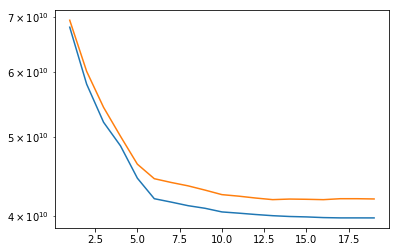

In [32]:
plt.plot(np.arange(1,len(actuales)+1),tr_error)
plt.plot(np.arange(1,len(actuales)+1),val_error)
plt.yscale('log')
plt.show()

#### 2.e Mutual information
Calcule la Información Mutual para nuestros datos. Note que esta función ya esta implementada.
Que información puede obtener de estos resultados? Concuerdan los datos encontrados con lo encontrado en la pregunta anterior? 

In [27]:
from sklearn.feature_selection import mutual_info_regression
MI = list(zip(mutual_info_regression(x_tr, y_tr),x_tr.columns))

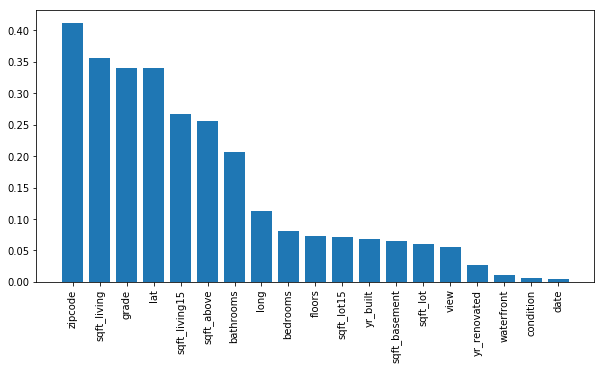

In [40]:
values = np.array([val[0] for val in MI])
features = np.array([val[1] for val in MI])
sort_idx = np.argsort(values)[::-1]
plt.figure(figsize=(10,5))
plt.bar(np.arange(1,len(values)+1),values[sort_idx])
plt.xticks(np.arange(1,len(values)+1), features[sort_idx])
plt.xticks(rotation=90)
plt.show()

#### 2.f Más variables
Repita lo realizado en la pregunta 2.c (incluyendo gráficos) pero agregando la variable categorica `zipcode` utilizando nuevamente `pd.get_dummies`. Esta vez puede optar por no realizar _K-fold_ si no entrenar una sola vez cada modelo pues podría resultar demasiado demandante en tiempo utilizar _K-fold_, aunque siempre es valorado. 
Qué modelo se comporta mejor y por qué cree que sucede esto? 

<a id="tercero"></a>
## 3. Clasificación. 

Para esta última parte de la tarea, utilizaremos un conjunto de datos de mediciones al corazón en pacientes con o sin cierta condicion cardiaca. El _dataset_ puede descargarse desde https://www.kaggle.com/shayanfazeli/heartbeat#ptbdb_abnormal.csv, utilizaremos en particular los archivos `ptbdb_normal.csv` y `ptbdb_abnormal.csv`. Nuestro objetivo principal será predecir a partir de las mediciones si un paciente tiene o no tiene la condición. Sin embargo también exploraremos técnicas de reducción de dimensionalidad para tratar de preprocesar los datos, pues una rápida exploración de los datos nos muestra que tenemos 188 atributos. 

#### 3.a Carga de datos
Cargue los datos, cree la columna `target` y junte ambos DataFrame en uno solo con método `append`. Por que es necesario pasar una lista de id al cargar los datos?

Explore rápidamente los datos: estan muy desbalanceadas las clases? Que tan dispares son las magnitudes de las mediciones? Pareciera necesario estandarizar los datos antes de utilizarlos? 

Separe los datos utilizando `train_test_split`. Qué habria ocurrido por la forma en que se cargaron los datos si utilizamos la opción `shuffle = False`? 

In [67]:
data_normal = pd.read_csv("ptbdb_normal.csv",names=[i for i in range(188)],header=None)
data_abnormal = pd.read_csv("ptbdb_abnormal.csv",names=[i for i in range(188)],header=None)
data_normal['target'] = 0
data_abnormal['target'] = 1
data = data_normal.append(data_abnormal,ignore_index=True)
np.unique(data['target'],return_counts=True)
data = data.drop(columns=[184,185,186,187])

In [68]:
data_pre_train, data_pre_val = train_test_split(data, test_size= 0.25)


In [69]:
#estandarización
print('Valor Maximo en el dataset {}\nValor Minimo en el dataset {}'.format(
        data.max().max(),data.min().min()))

Valor Maximo en el dataset 1.0
Valor Minimo en el dataset 0.0


In [70]:
x_tr = data_pre_train.drop(columns=['target'])
y_tr = data_pre_train['target']

x_val = data_pre_val.drop(columns=['target'])
y_val = data_pre_val['target']


#### 3.b Correlación
Calcule la matriz de correlación, note que esto esta implementado en pandas. Representela de alguna forma que le parezca adecuada, por ejemplo como un _heatmap_. 
Qué observa, comente.  Elimine las columnas que muestra el código. 

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr())
#data = data.drop(columns=[184,185,186,187])

#### 3.c Regresión Logistica
Realice una primera regresión logística con los datos. Que valor entrega el metodo `score`?

Calcule la matriz de confusión y comente respecto al valor dado por el `score`. Comente sobre la distinta información entregrada por la matriz de confusión y su interpretación. 

/opt/miniconda/envs/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score:0.827836, validation score:0.829027


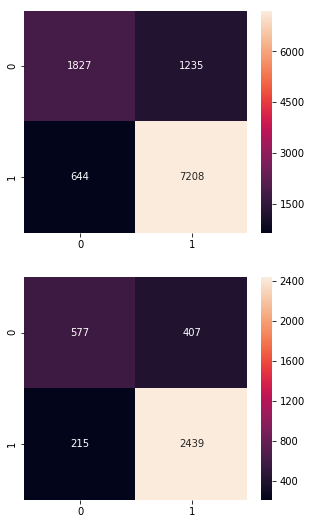

In [72]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

reg.fit(x_tr,y_tr)
train_score = reg.score(x_tr,y_tr)
val_score = reg.score(x_val,y_val)
#test_score = reg.score(x_test,y_test)

tr_predict = reg.predict(x_tr)
val_predict = reg.predict(x_val)
#test_predict = reg.predict(x_test)

print("train score:{:.6f}, validation score:{:.6f}".format(train_score,val_score))

from sklearn import metrics

confusion_matrix_tr = metrics.confusion_matrix(y_tr, tr_predict)
confusion_matrix_val = metrics.confusion_matrix(y_val, val_predict)

fig,ax = plt.subplots(2,1,figsize=(5,9))

sns.heatmap(confusion_matrix_tr,annot=True,fmt="d",ax=ax[0])
sns.heatmap(confusion_matrix_val,annot=True,fmt="d",ax=ax[1])

ax[0].set_title('Matriz de confusion Training')
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predecido')

ax[1].set_title('Matriz de confusion Validation')
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predecido')

plt.show()
plt.show()

#### 3.d Otra métrica. 
Otra forma de comparar modelos podría ser con la siguiente métrica. Esta mide la cantidad de aciertos pero toma en cuenta algo más. Que interpretación podría darle a la métrica en el código? 

Si un modelo entrega 0.5 y otro 0.4 en esta métrica, cual es mejor? 

In [74]:
print(np.mean((np.max(reg.predict_proba(x_val),axis=1)*(reg.predict(x_val)-y_val))**2))

0.08127117566467298


#### 3.e PCA y LDA
Transforme los datos mediante PCA a 2 dimensiones y grafique un subsampleo de alrededor de 50 - 100 datos con 50% de cada clase. Coloree cada punto correspondiente a la clase a la que pertenece. 

Realice el mismo analisis para LDA, considerando el mismo conjunto de puntos. Cual de ambos métodos le parece más apropiado?

Grafíque el centro de gravedad (promedio en cada cordenada) de cada una de las clases luego de la reducción de dimensionalidad. 

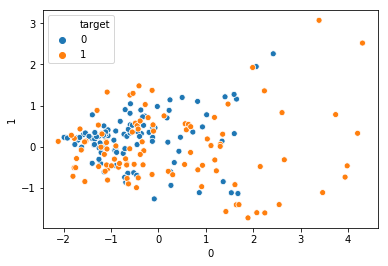

In [77]:
trgts_temp = data.target
pca1 = decomposition.PCA(n_components=2)
data_transformed = pca1.fit_transform(data.drop(columns=['target']))

data_transformed_0 = data_transformed[trgts_temp ==0]
data_transformed_1 = data_transformed[trgts_temp ==1]

indices_0 = np.random.choice(data_transformed_0.shape[0], 100, replace=False)
indices_1 = np.random.choice(data_transformed_1.shape[0], 100, replace=False)

df_0 = pd.DataFrame(data_transformed_0[indices_0])
df_0['target'] = 0
df_1 = pd.DataFrame(data_transformed_1[indices_1])
df_1['target'] = 1

temp_df = df_0.append(df_1,ignore_index=True)

sns.scatterplot(x=0,y=1,hue='target',data=temp_df)
plt.show()

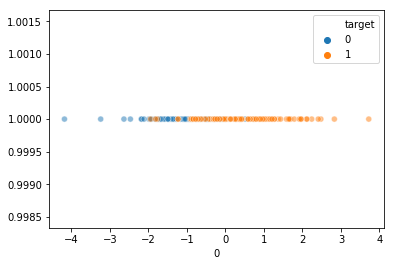

In [78]:
X = data.drop(columns=['target']).values
y = data.target.values
from sklearn import discriminant_analysis 
lda = discriminant_analysis.LinearDiscriminantAnalysis(solver='svd',n_components=2)

lda.fit(X,y)
data_transformed = lda.transform(X)

data_transformed_0 = data_transformed[y == 0]
data_transformed_1 = data_transformed[y == 1]

indices_0 = np.random.choice(data_transformed_0.shape[0], 100, replace=False)
indices_1 = np.random.choice(data_transformed_1.shape[0], 100, replace=False)

df_0 = pd.DataFrame(data_transformed_0[indices_0])
df_0['target'] = 0
df_1 = pd.DataFrame(data_transformed_1[indices_1])
df_1['target'] = 1

temp_df = df_0.append(df_1,ignore_index=True)

sns.scatterplot(x=0,y=1,hue='target',data=temp_df,alpha=0.5)
plt.show()

#### 3.f Más reducción de dimensionalidad
Entrene un modelo de regresión logística para el método que le pareció más apropiado de la pregunta aterior, haciendo variar el numero de componentes de 2 a 120. Calcule para cada modelo alguna métrica de la calidad del modelo tanto sobre el conjunto de entrenamiento como sobre el conjunto de validación. 

Grafíque como varían ambos errores en función de la dimensionalidad sobre la que se trabaja. 

Si le sobra *tiempo* y _c r e a t i v i d a d_  proponga cambios o extienda la exploración buscando mejorar el desempeño o comprender mejor el problema (solo para puntaje extra).

[//]: <> (  https://meme.xyz/uploads/posts/t/l-27712-i-procrastinate-to-the-last-minute-den-i-freaked-it.jpg )

In [88]:
%%time
results = []
for i in range(2,121):
    reg = LogisticRegression(solver='liblinear')
    pcai = decomposition.PCA(n_components=i)
    pcai.fit(x_tr,y_tr)
    x_tr_pca = pcai.transform(x_tr)
    x_val_pca = pcai.transform(x_val)
    reg.fit(x_tr_pca,y_tr)
    train_score = reg.score(x_tr_pca,y_tr)
    val_score = reg.score(x_val_pca,y_val)
    
    tr_predict = reg.predict(x_tr_pca)
    val_predict = reg.predict(x_val_pca)
    
    tr_mse = metrics.mean_squared_error(y_tr,tr_predict)
    val_mse = metrics.mean_squared_error(y_val,val_predict)
    
    tr_mae = metrics.mean_absolute_error(y_tr,tr_predict)
    val_mae = metrics.mean_absolute_error(y_val,val_predict)
    results.append({'n_components':i,'train_mse':tr_mse,'val_mse':val_mse,
                    'train_score':train_score,'val_score':val_score,
                    'train_mae':tr_mae,'val_mae':val_mae})

CPU times: user 2min 12s, sys: 1.37 s, total: 2min 13s
Wall time: 24.2 s


In [89]:
results = pd.DataFrame(results)
results.tail()

n_components  train_mae  train_mse  train_score   val_mae   val_mse  \
114           116   0.174363   0.174363     0.825637  0.172897  0.172897   
115           117   0.173997   0.173997     0.826003  0.172347  0.172347   
116           118   0.173722   0.173722     0.826278  0.172897  0.172897   
117           119   0.174088   0.174088     0.825912  0.173722  0.173722   
118           120   0.173722   0.173722     0.826278  0.173722  0.173722   

     val_score  
114   0.827103  
115   0.827653  
116   0.827103  
117   0.826278  
118   0.826278

In [90]:
best_model = results.sort_values('val_score',ascending=False).iloc[0]
best_model

n_components    111.000000
train_mae         0.173630
train_mse         0.173630
train_score       0.826370
val_mae           0.171523
val_mse           0.171523
val_score         0.828477
Name: 109, dtype: float64

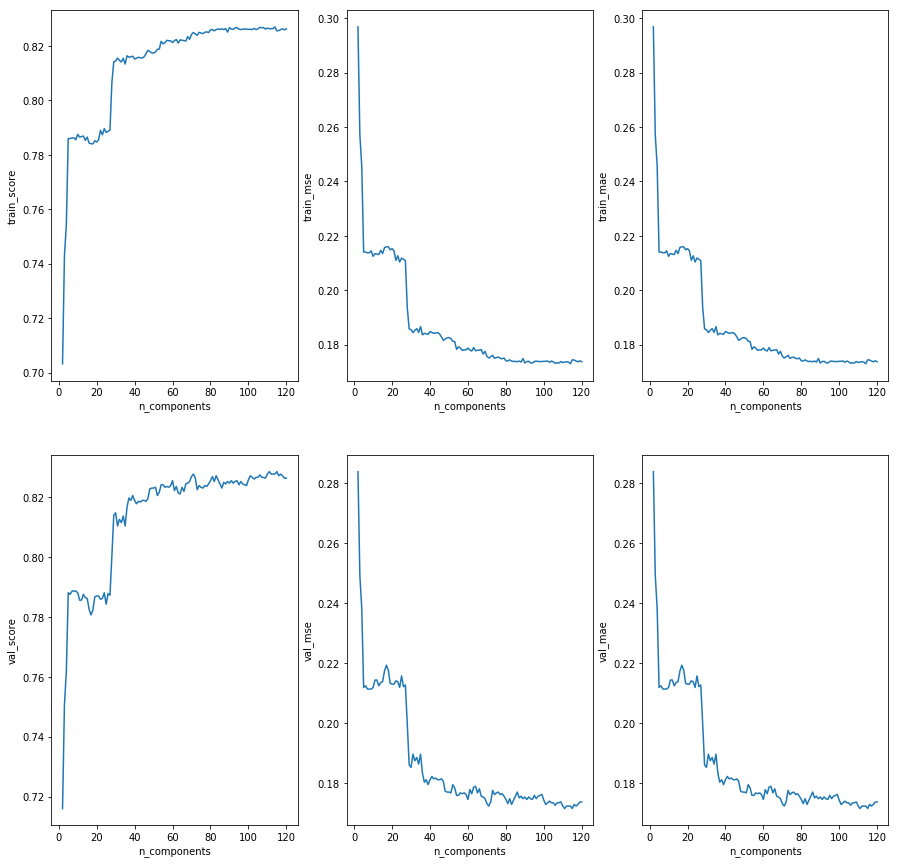

In [91]:
fig,ax = plt.subplots(2,3,figsize=(15,15))
sns.lineplot(x='n_components',y='train_score',data=results,ax=ax[0,0])
sns.lineplot(x='n_components',y='train_mse',data=results,ax=ax[0,1])
sns.lineplot(x='n_components',y='train_mae',data=results,ax=ax[0,2])

sns.lineplot(x='n_components',y='val_score',data=results,ax=ax[1,0])
sns.lineplot(x='n_components',y='val_mse',data=results,ax=ax[1,1])
sns.lineplot(x='n_components',y='val_mae',data=results,ax=ax[1,2])

plt.show()

#### 3.g Naive Bayes
"Entrene" un modelo utilizando Naive Bayes y comparelo con el modelo logístico que entrenó anteriormente. Le parece adecuado el nombre _Naive_?

train score:0.647700, validation score:0.636339


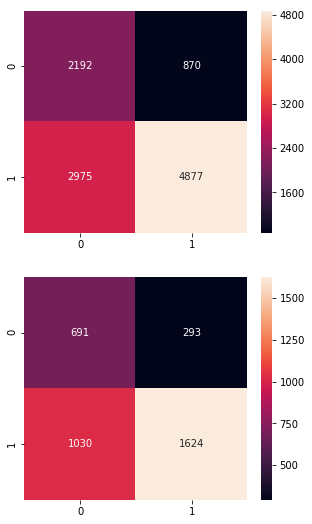

In [83]:
from sklearn import naive_bayes as sknb
NB = sknb.BernoulliNB()

NB.fit(x_tr,y_tr)
train_score = NB.score(x_tr,y_tr)
val_score = NB.score(x_val,y_val)

tr_predict = NB.predict(x_tr)
val_predict = NB.predict(x_val)

print("train score:{:.6f}, validation score:{:.6f}".format(train_score,val_score))



confusion_matrix_tr = metrics.confusion_matrix(y_tr, tr_predict)
confusion_matrix_val = metrics.confusion_matrix(y_val, val_predict)

fig,ax = plt.subplots(2,1,figsize=(5,9))

sns.heatmap(confusion_matrix_tr,annot=True,fmt="d",ax=ax[0])
sns.heatmap(confusion_matrix_val,annot=True,fmt="d",ax=ax[1])

plt.show()